In [120]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 15, 6

In [121]:
data = pd.read_csv('LEADINGDATED.csv')


In [122]:
data.head()



,MONTH,SAFEACTS,SAFECONDITIONS,UNSAFEACT,UNSAFECONDITION,PROCEDURE,PPE,SAFETYOBSERVATIONS,TRIFR
0,2010-04,1836,562,3125,2955,3006,1297,8477,26
1,2010-05,1548,439,2836,2867,2683,1131,7689,22
2,2010-06,1507,401,2810,2921,2691,1124,7639,27
3,2010-07,1414,448,2712,2736,2735,1047,7310,37
4,2010-08,1512,492,2681,2772,2709,1055,7462,22


In [123]:
data.dtypes

MONTH                 object
SAFEACTS               int64
SAFECONDITIONS         int64
UNSAFEACT              int64
UNSAFECONDITION        int64
PROCEDURE              int64
PPE                    int64
SAFETYOBSERVATIONS     int64
TRIFR                  int64
dtype: object

# Reading data as time series

In [124]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('LEADINGDATED.csv', parse_dates=['MONTH'], index_col = 'MONTH') #, index_col='Month',date_parser=dateparse)


In [125]:
data.head()


,SAFEACTS,SAFECONDITIONS,UNSAFEACT,UNSAFECONDITION,PROCEDURE,PPE,SAFETYOBSERVATIONS,TRIFR
MONTH,,,,,,,,
2010-04-01,1836,562,3125,2955,3006,1297,8477,26
2010-05-01,1548,439,2836,2867,2683,1131,7689,22
2010-06-01,1507,401,2810,2921,2691,1124,7639,27
2010-07-01,1414,448,2712,2736,2735,1047,7310,37
2010-08-01,1512,492,2681,2772,2709,1055,7462,22


In [126]:
data.index

DatetimeIndex(['2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01'],
              dtype='datetime64[ns]', name='MONTH', freq=None)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [128]:
data_l1 = data

# Using Pre-built normalizer

In [129]:
data_l1n = preprocessing.normalize(data_l1, norm='l1')

In [130]:
data_l1n

array([[0.08626198, 0.02640481, 0.14682391, 0.13883668, 0.14123285,
        0.06093779, 0.3982804 , 0.00122157],
       [0.08056206, 0.02284673, 0.14759303, 0.14920635, 0.1396305 ,
        0.05886027, 0.40015613, 0.00114494],
       [0.07881799, 0.0209728 , 0.14696653, 0.15277197, 0.14074268,
        0.05878661, 0.39952929, 0.00141213],
       [0.07668529, 0.02429633, 0.14707956, 0.14838115, 0.14832692,
        0.05678182, 0.39644232, 0.00200662],
       [0.080834  , 0.02630313, 0.14333066, 0.14819567, 0.14482759,
        0.05640203, 0.39893077, 0.00117616],
       [0.07514655, 0.02132606, 0.14554275, 0.15362846, 0.14837275,
        0.05902567, 0.39564382, 0.00131393],
       [0.07707225, 0.02000222, 0.14350621, 0.15497562, 0.1470523 ,
        0.06089317, 0.39555629, 0.00094193],
       [0.0811667 , 0.02068017, 0.14081645, 0.15271054, 0.15366685,
        0.05462913, 0.39531409, 0.00101608],
       [0.08618893, 0.01986971, 0.13954397, 0.1495114 , 0.15289902,
        0.05570033, 0.395114

# Plotting data

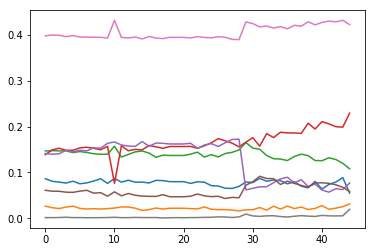

In [131]:
plt.plot(data_l1n)

In [132]:
from statsmodels.tsa.stattools import adfuller


# Taking Rolling mean

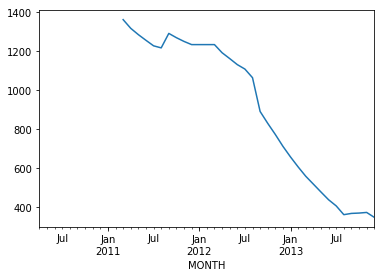

In [133]:
data['Rolling_Mean'] = data['SAFEACTS'].rolling(window = 12).mean().plot()



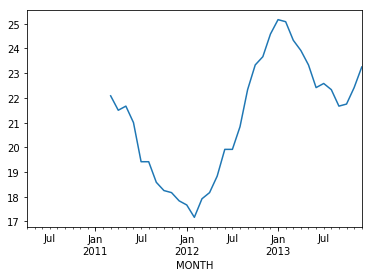

In [134]:
data['Rolling_Mean'] = data['TRIFR'].rolling(window = 12).mean().plot()


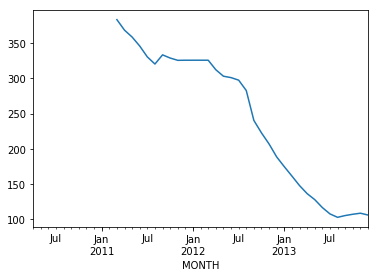

In [135]:
data['Rolling_Mean'] = data['SAFECONDITIONS'].rolling(window = 12).mean().plot()


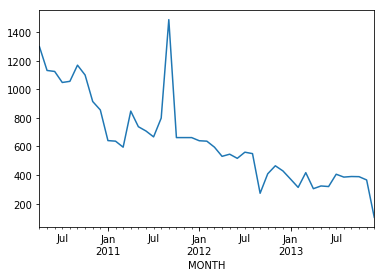

In [136]:
data.PPE.plot()
plt.show()

# Performing Augmented Dickey Fuller Test

In [137]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data.PPE, maxlag = 1)
adf[0]

-1.7342748807000798

In [138]:
adf[4]


{'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}

In [139]:
ts_log = np.log(data.PPE)


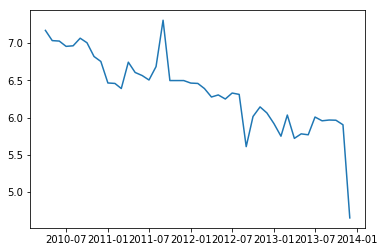

In [140]:
plt.plot(ts_log)


In [141]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg= ts_log.rolling(window = 12).mean()

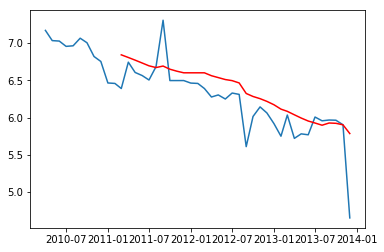

In [142]:
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [143]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

MONTH
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
2010-08-01         NaN
2010-09-01         NaN
2010-10-01         NaN
2010-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01         NaN
2011-03-01   -0.451505
Name: PPE, dtype: float64

# Applying first difference

In [144]:
ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

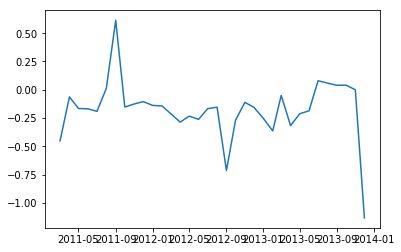

In [145]:
plt.plot(ts_log_moving_avg_diff)

# Again applying Augmented Dickey Fuller test

In [146]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts_log_moving_avg_diff, maxlag = 1)
adf[0]

-3.809876919418817

In [147]:
adf[4]

{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

In [148]:
from statsmodels.tsa.stattools import acf, pacf


In [149]:
lag_acf = acf(ts_log_moving_avg_diff, nlags=20)


C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [150]:
lag_pacf = pacf(ts_log_moving_avg_diff, nlags=20, method='ols')


# Using autocorrelation function

Text(0.5, 1.0, 'Autocorrelation Function')

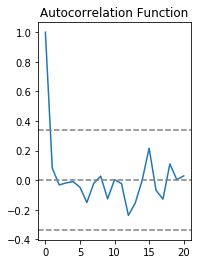

In [151]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Using partial autocorrelaton function

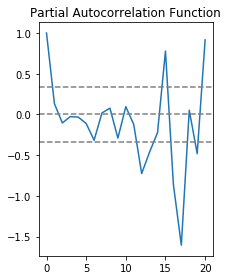

In [152]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA model

In [153]:
from statsmodels.tsa.arima_model import ARIMA


C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

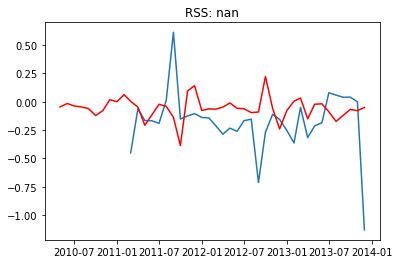

In [154]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_moving_avg_diff)**2))

C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

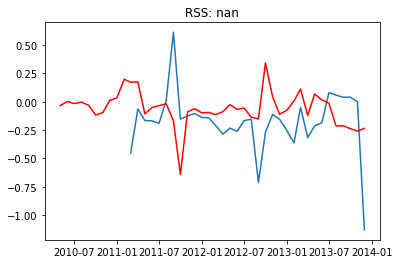

In [155]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_moving_avg_diff)**2))

C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: nan')

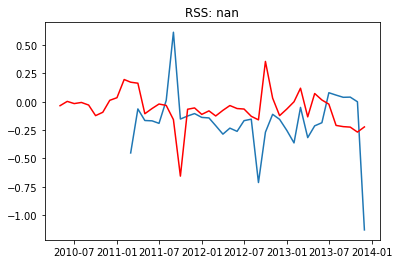

In [156]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_moving_avg_diff)**2))

In [157]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

MONTH
2010-05-01   -0.034392
2010-06-01    0.003722
2010-07-01   -0.015689
2010-08-01   -0.005695
2010-09-01   -0.028620
dtype: float64


In [158]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

MONTH
2010-05-01   -0.034392
2010-06-01   -0.030670
2010-07-01   -0.046359
2010-08-01   -0.052055
2010-09-01   -0.080674
dtype: float64


In [159]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


MONTH
2010-04-01    7.167809
2010-05-01    7.133418
2010-06-01    7.137139
2010-07-01    7.121450
2010-08-01    7.115755
dtype: float64

Text(0.5, 1.0, 'RMSE: 333.8321')

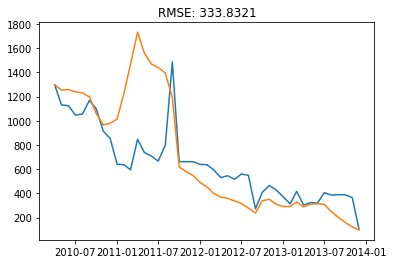

In [160]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data.PPE)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data.PPE)**2)/len(data.PPE)))

# Plotting Auto-correlation function graph

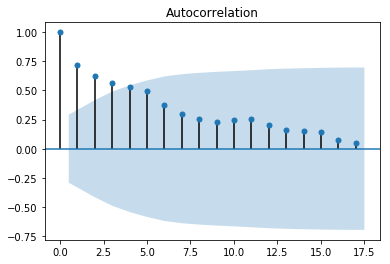

In [176]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

d=data.PPE
plot_acf(d)
pyplot.show()

# the pre defined ACF function

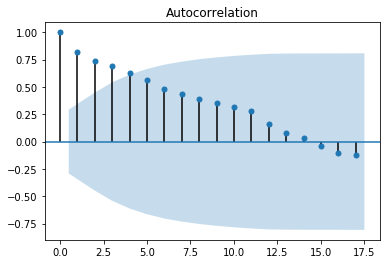

In [162]:
d=data.PROCEDURE
plot_acf(d)
pyplot.show()

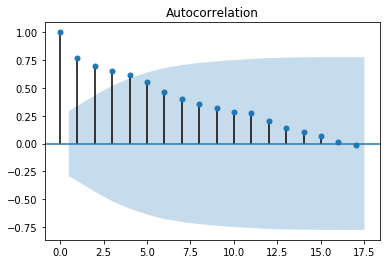

In [164]:
d=data.SAFEACTS
plot_acf(d)
pyplot.show()

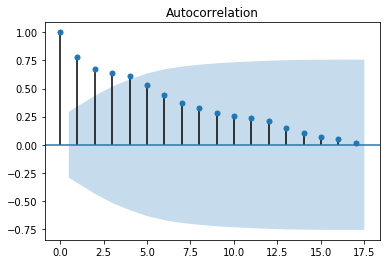

In [166]:
d=data.SAFECONDITIONS
plot_acf(d)
pyplot.show()

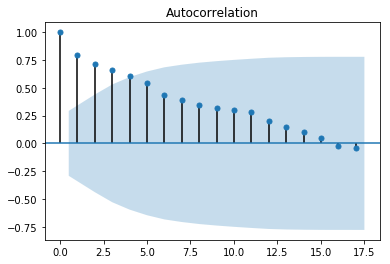

In [167]:
d=data.UNSAFEACT
plot_acf(d)
pyplot.show()

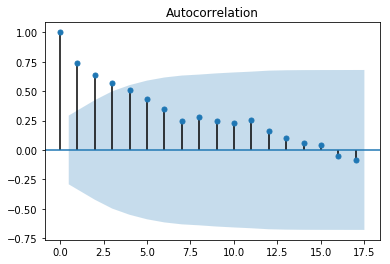

In [168]:
d=data.UNSAFECONDITION
plot_acf(d)
pyplot.show()

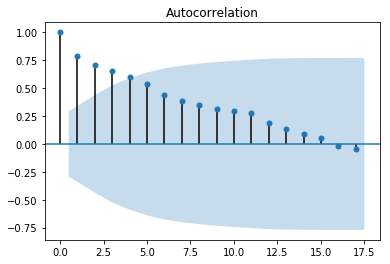

In [170]:
d=data.SAFETYOBSERVATIONS
plot_acf(d)
pyplot.show()

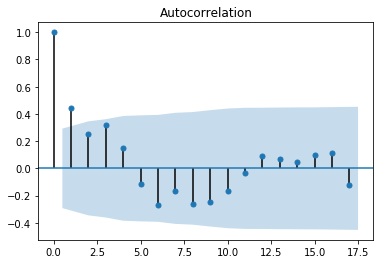

In [171]:
d=data.TRIFR
plot_acf(d)
pyplot.show()

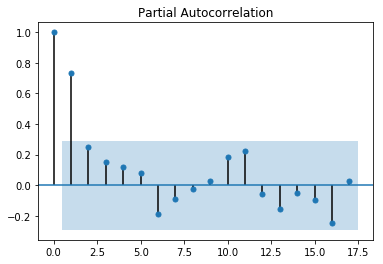

In [179]:
d=data.PPE
plot_pacf(d)
pyplot.show()

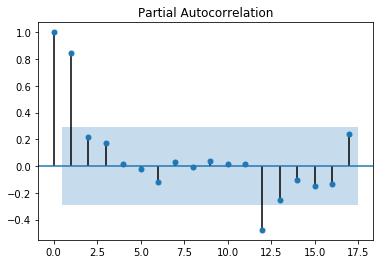

In [180]:
d=data.PROCEDURE
plot_pacf(d)
pyplot.show()

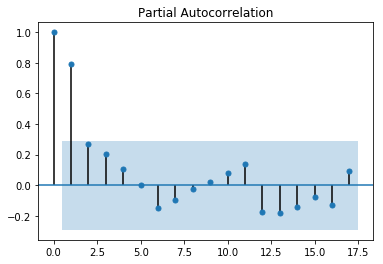

In [181]:
d=data.SAFEACTS
plot_pacf(d)
pyplot.show()

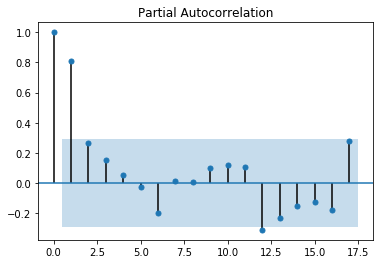

In [182]:
d=data.UNSAFEACT
plot_pacf(d)
pyplot.show()

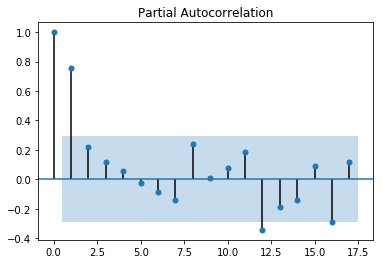

In [183]:
d=data.UNSAFECONDITION
plot_pacf(d)
pyplot.show()

In [53]:
from statsmodels.tsa.vector_ar.var_model import VAR


# Using VAR model

In [50]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

In [52]:
mdata = sm.datasets.macrodata.load_pandas().data

In [53]:
 data = np.log(data_l1n)

model

In [54]:
model = VAR(data)

In [55]:
results = model.fit(2)

# Result summary

In [56]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 21, Mar, 2020
Time:                     15:43:49
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -35.9755
Nobs:                     43.0000    HQIC:                  -39.4917
Log likelihood:           541.121    FPE:                1.30356e-18
AIC:                     -41.5458    Det(Omega_mle):     9.07128e-20
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       -20.471902         6.830020           -2.997           0.003
L1.y1        -0.523720         0.297169           -1.762           0.078
L1.y2        -0.004323         0.163485           -0.026           0.979
L1.y3         0.337660

In [57]:
from statsmodels.tsa.stattools import grangercausalitytests

In [58]:
data = pd.read_csv('LEADINGDATED.csv')


In [59]:
data.head()

,MONTH,SAFEACTS,SAFECONDITIONS,UNSAFEACT,UNSAFECONDITION,PROCEDURE,PPE,SAFETYOBSERVATIONS,TRIFR
0,2010-04,1836,562,3125,2955,3006,1297,8477,26
1,2010-05,1548,439,2836,2867,2683,1131,7689,22
2,2010-06,1507,401,2810,2921,2691,1124,7639,27
3,2010-07,1414,448,2712,2736,2735,1047,7310,37
4,2010-08,1512,492,2681,2772,2709,1055,7462,22


In [60]:
a= data.PPE

In [61]:
b= data.TRIFR

In [62]:
a[0]

1297

# Applying Granger causality tests

In [63]:
grangercausalitytests([[a[i], b[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9841  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9835  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9835  , df=1
parameter F test:         F=0.0004  , p=0.9841  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.0004003770221391544, 0.9841329177446969, 41.0, 1),
   'ssr_chi2test': (0.000429672901807873, 0.983462192057523, 1),
   'lrtest': (0.0004296708038964425, 0.9834622324253584, 1),
   'params_ftest': (0.0004003770221318149, 0.9841329177448773, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [64]:
a1= data.PROCEDURE
b1= data.TRIFR

In [65]:
grangercausalitytests([[a1[i], b1[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2470  , p=0.6218  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2651  , p=0.6066  , df=1
likelihood ratio test: chi2=0.2643  , p=0.6072  , df=1
parameter F test:         F=0.2470  , p=0.6218  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.24700833631198982, 0.6218442156203297, 41.0, 1),
   'ssr_chi2test': (0.26508211701774514, 0.6066499737256283, 1),
   'lrtest': (0.26428680370349866, 0.6071902411013049, 1),
   'params_ftest': (0.24700833631199992, 0.6218442156203265, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [66]:
a2= data.SAFEACTS
b2= data.TRIFR

In [67]:
grangercausalitytests([[a2[i], b2[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0933  , p=0.7615  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1001  , p=0.7517  , df=1
likelihood ratio test: chi2=0.1000  , p=0.7518  , df=1
parameter F test:         F=0.0933  , p=0.7615  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.09331691922874641, 0.7615475822612056, 41.0, 1),
   'ssr_chi2test': (0.1001449864893864, 0.7516557139345375, 1),
   'lrtest': (0.10003119300381513, 0.7517922044368812, 1),
   'params_ftest': (0.09331691922875725, 0.7615475822611999, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [68]:
a3= data.SAFECONDITIONS
b3= data.TRIFR

In [69]:
grangercausalitytests([[a3[i], b3[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1295  , p=0.7208  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1389  , p=0.7094  , df=1
likelihood ratio test: chi2=0.1387  , p=0.7096  , df=1
parameter F test:         F=0.1295  , p=0.7208  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.129451296048711, 0.720848347862531, 41.0, 1),
   'ssr_chi2test': (0.1389233421010557, 0.7093537104530898, 1),
   'lrtest': (0.13870448793028345, 0.7095723382458834, 1),
   'params_ftest': (0.12945129604870712, 0.7208483478625405, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [70]:
a4= data.UNSAFEACT
b4= data.TRIFR

In [71]:
grangercausalitytests([[a4[i], b4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0944  , p=0.7602  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1014  , p=0.7502  , df=1
likelihood ratio test: chi2=0.1012  , p=0.7504  , df=1
parameter F test:         F=0.0944  , p=0.7602  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.09444116458721745, 0.7601608834776274, 41.0, 1),
   'ssr_chi2test': (0.1013514937033553, 0.7502137774327273, 1),
   'lrtest': (0.10123494394997579, 0.7503526561558679, 1),
   'params_ftest': (0.09444116458723, 0.7601608834776106, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [72]:
a5= data.UNSAFECONDITION
b5= data.TRIFR

In [73]:
grangercausalitytests([[a5[i], b5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0180  , p=0.8939  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0193  , p=0.8895  , df=1
likelihood ratio test: chi2=0.0193  , p=0.8895  , df=1
parameter F test:         F=0.0180  , p=0.8939  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.017998373835047765, 0.8939340234681967, 41.0, 1),
   'ssr_chi2test': (0.01931532801810004, 0.8894662728364866, 1),
   'lrtest': (0.019311089691427696, 0.8894783227371086, 1),
   'params_ftest': (0.017998373835046228, 0.8939340234681967, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [74]:
a6= data.SAFETYOBSERVATIONS
b6= data.TRIFR

In [75]:
grangercausalitytests([[a6[i], b6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0906  , p=0.7650  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0972  , p=0.7552  , df=1
likelihood ratio test: chi2=0.0971  , p=0.7554  , df=1
parameter F test:         F=0.0906  , p=0.7650  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.09055773342968423, 0.7649901481718124, 41.0, 1),
   'ssr_chi2test': (0.0971839090464904, 0.7552355887754063, 1),
   'lrtest': (0.09707674054652671, 0.755366268506721, 1),
   'params_ftest': (0.09055773342968014, 0.7649901481718124, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [76]:
grangercausalitytests([[a[i], a1[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5516  , p=0.4619  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.5919  , p=0.4417  , df=1
likelihood ratio test: chi2=0.5880  , p=0.4432  , df=1
parameter F test:         F=0.5516  , p=0.4619  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.5515572179571266, 0.4619162160171154, 41.0, 1),
   'ssr_chi2test': (0.5919150631735018, 0.44167952970187807, 1),
   'lrtest': (0.5879690108470186, 0.44320556600351524, 1),
   'params_ftest': (0.5515572179571087, 0.4619162160171211, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [77]:
grangercausalitytests([[a[i], a2[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6962  , p=0.4089  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.7472  , p=0.3874  , df=1
likelihood ratio test: chi2=0.7409  , p=0.3894  , df=1
parameter F test:         F=0.6962  , p=0.4089  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.69624173132949, 0.40888497006314783, 41.0, 1),
   'ssr_chi2test': (0.747186248256038, 0.3873685460264953, 1),
   'lrtest': (0.7409129944396682, 0.38936857033537475, 1),
   'params_ftest': (0.6962417313294442, 0.40888497006316527, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [78]:
grangercausalitytests([[a[i], a3[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9540  , p=0.0118  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=7.4629  , p=0.0063  , df=1
likelihood ratio test: chi2=6.8935  , p=0.0087  , df=1
parameter F test:         F=6.9540  , p=0.0118  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (6.954039125734832, 0.011760120893341672, 41.0, 1),
   'ssr_chi2test': (7.462871256886161, 0.0062984466250683695, 1),
   'lrtest': (6.89352256015809, 0.008650863005811757, 1),
   'params_ftest': (6.954039125728176, 0.011760120893378958, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [79]:
grangercausalitytests([[a[i], a4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0162  , p=0.3193  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=1.0906  , p=0.2963  , df=1
likelihood ratio test: chi2=1.0773  , p=0.2993  , df=1
parameter F test:         F=1.0162  , p=0.3193  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (1.0162167104615978, 0.3193306811964239, 41.0, 1),
   'ssr_chi2test': (1.0905740307392757, 0.2963440572223055, 1),
   'lrtest': (1.0772779252747569, 0.2993073017203658, 1),
   'params_ftest': (1.0162167104615696, 0.3193306811964312, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [80]:
grangercausalitytests([[a[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2446  , p=0.6236  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2625  , p=0.6084  , df=1
likelihood ratio test: chi2=0.2617  , p=0.6090  , df=1
parameter F test:         F=0.2446  , p=0.6236  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.24457722575495477, 0.6235592472798277, 41.0, 1),
   'ssr_chi2test': (0.2624731203223905, 0.6084261564149307, 1),
   'lrtest': (0.26169335459439935, 0.60895917711906, 1),
   'params_ftest': (0.24457722575494692, 0.6235592472798343, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [81]:
grangercausalitytests([[a[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8385  , p=0.3652  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.8998  , p=0.3428  , df=1
likelihood ratio test: chi2=0.8908  , p=0.3453  , df=1
parameter F test:         F=0.8385  , p=0.3652  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.8384765585918115, 0.36518737193091266, 41.0, 1),
   'ssr_chi2test': (0.8998285019034075, 0.34282770024781545, 1),
   'lrtest': (0.8907510157011984, 0.3452738709184956, 1),
   'params_ftest': (0.838476558591785, 0.36518737193092066, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [82]:
grangercausalitytests([[a2[i], a3[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3768  , p=0.0734  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=3.6238  , p=0.0570  , df=1
likelihood ratio test: chi2=3.4823  , p=0.0620  , df=1
parameter F test:         F=3.3768  , p=0.0734  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (3.3767632053107506, 0.07337610808108593, 41.0, 1),
   'ssr_chi2test': (3.623843439845684, 0.05695714752606791, 1),
   'lrtest': (3.482332238267418, 0.062027262490396806, 1),
   'params_ftest': (3.376763205310737, 0.0733761080810866, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [83]:
grangercausalitytests([[a2[i], a4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1486  , p=0.7019  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1594  , p=0.6897  , df=1
likelihood ratio test: chi2=0.1592  , p=0.6899  , df=1
parameter F test:         F=0.1486  , p=0.7019  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.14857333784461285, 0.7018951228633219, 41.0, 1),
   'ssr_chi2test': (0.1594445576869016, 0.6896684145150883, 1),
   'lrtest': (0.15915636090403495, 0.6899344251958563, 1),
   'params_ftest': (0.14857333784462615, 0.7018951228633088, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [84]:
grangercausalitytests([[a2[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0024  , p=0.9614  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0025  , p=0.9598  , df=1
likelihood ratio test: chi2=0.0025  , p=0.9598  , df=1
parameter F test:         F=0.0024  , p=0.9614  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.002367525912784386, 0.9614287208433882, 41.0, 1),
   'ssr_chi2test': (0.002540759516158853, 0.9597988972086429, 1),
   'lrtest': (0.0025406861616374954, 0.9597994770465402, 1),
   'params_ftest': (0.002367525912787019, 0.9614287208433511, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [85]:
grangercausalitytests([[a2[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2021  , p=0.6554  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2169  , p=0.6414  , df=1
likelihood ratio test: chi2=0.2164  , p=0.6418  , df=1
parameter F test:         F=0.2021  , p=0.6554  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.20214799923415067, 0.6553606337090644, 41.0, 1),
   'ssr_chi2test': (0.21693931625128365, 0.6413819673304955, 1),
   'lrtest': (0.2164062646190814, 0.6417919139898915, 1),
   'params_ftest': (0.20214799923416585, 0.6553606337090534, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [86]:
grangercausalitytests([[a3[i], a4[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0191  , p=0.8908  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0205  , p=0.8862  , df=1
likelihood ratio test: chi2=0.0205  , p=0.8862  , df=1
parameter F test:         F=0.0191  , p=0.8908  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.019100985131460132, 0.8907539314837893, 41.0, 1),
   'ssr_chi2test': (0.020498618189859652, 0.8861532488916437, 1),
   'lrtest': (0.02049384474804583, 0.8861664148958958, 1),
   'params_ftest': (0.019100985131532865, 0.8907539314835822, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [87]:
grangercausalitytests([[a3[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4439  , p=0.5090  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.4764  , p=0.4901  , df=1
likelihood ratio test: chi2=0.4738  , p=0.4912  , df=1
parameter F test:         F=0.4439  , p=0.5090  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.4438976561988115, 0.5089789694266675, 41.0, 1),
   'ssr_chi2test': (0.47637797250604164, 0.490067543103323, 1),
   'lrtest': (0.4738176183043947, 0.49123610839146004, 1),
   'params_ftest': (0.44389765619869775, 0.5089789694267204, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [88]:
grangercausalitytests([[a3[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0408  , p=0.8408  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0438  , p=0.8342  , df=1
likelihood ratio test: chi2=0.0438  , p=0.8342  , df=1
parameter F test:         F=0.0408  , p=0.8408  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.0408496996389516, 0.8408278655813345, 41.0, 1),
   'ssr_chi2test': (0.043838702051557814, 0.8341539948020974, 1),
   'lrtest': (0.04381687754903396, 0.8341946824470973, 1),
   'params_ftest': (0.040849699638957175, 0.8408278655813345, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [89]:
grangercausalitytests([[a4[i], a5[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9712  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9700  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9700  , df=1
parameter F test:         F=0.0013  , p=0.9712  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.001315842292338662, 0.9712394921793716, 41.0, 1),
   'ssr_chi2test': (0.0014121234356805153, 0.9700239649056281, 1),
   'lrtest': (0.0014121007759513304, 0.9700242052995909, 1),
   'params_ftest': (0.0013158422923494626, 0.9712394921792223, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [90]:
grangercausalitytests([[a4[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1808  , p=0.6729  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.1941  , p=0.6595  , df=1
likelihood ratio test: chi2=0.1936  , p=0.6599  , df=1
parameter F test:         F=0.1808  , p=0.6729  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (0.180842260615436, 0.6728741986022342, 41.0, 1),
   'ssr_chi2test': (0.1940746211482728, 0.6595467634907819, 1),
   'lrtest': (0.19364786468304374, 0.6598977159740469, 1),
   'params_ftest': (0.18084226061543515, 0.6728741986022342, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

In [91]:
grangercausalitytests([[a5[i], a6[i]] for i in range(0, len(a))], 1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4839  , p=0.0403  , df_denom=41, df_num=1
ssr based chi2 test:   chi2=4.8120  , p=0.0283  , df=1
likelihood ratio test: chi2=4.5666  , p=0.0326  , df=1
parameter F test:         F=4.4839  , p=0.0403  , df_denom=41, df_num=1


{1: ({'ssr_ftest': (4.483910304438002, 0.04032576934718917, 41.0, 1),
   'ssr_chi2test': (4.812001302323709, 0.028262204782446086, 1),
   'lrtest': (4.5666093893962625, 0.032601029195836115, 1),
   'params_ftest': (4.483910304437994, 0.040325769347189414, 41.0, 1.0)},
   array([[0., 1., 0.]])])}

<h2>Start of Change Point Analysis</h1>

In [71]:
import matplotlib.pyplot as plt
import ruptures as rpt
import cProfile

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18c2d3eb8>])

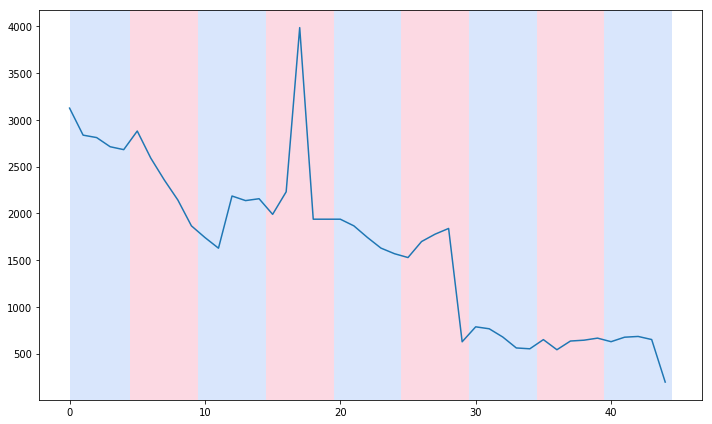

In [74]:
model = "l2"
A = data.SAFEACTS
points=np.array(data['UNSAFEACT'])
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18c333c50>])

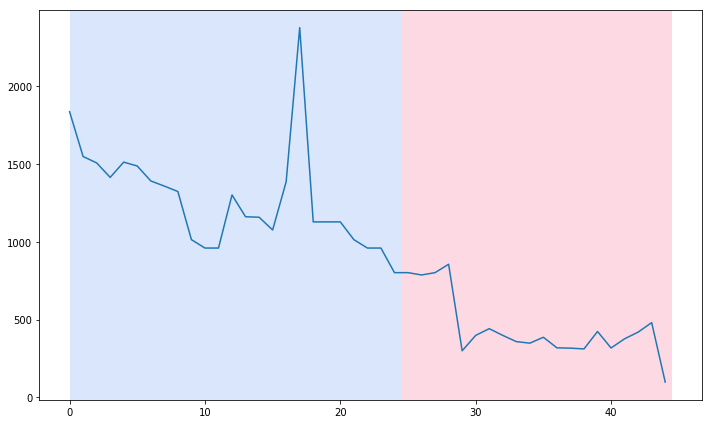

In [75]:
model="rbf"
points=np.array(data['SAFEACTS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18cc525c0>])

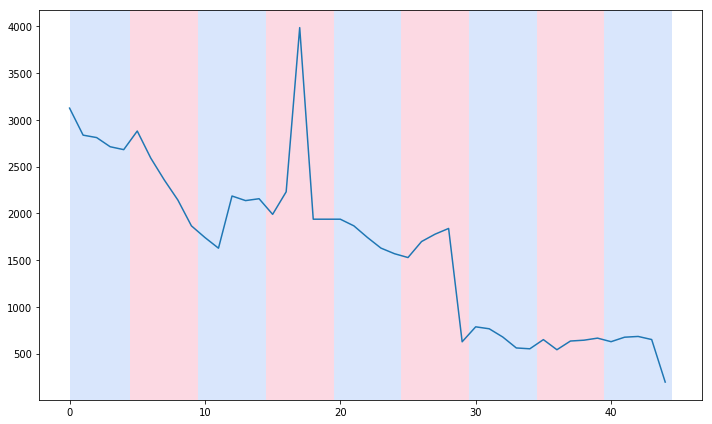

In [76]:
model = "l2"
points=np.array(data['UNSAFEACT'])
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18cb48048>])

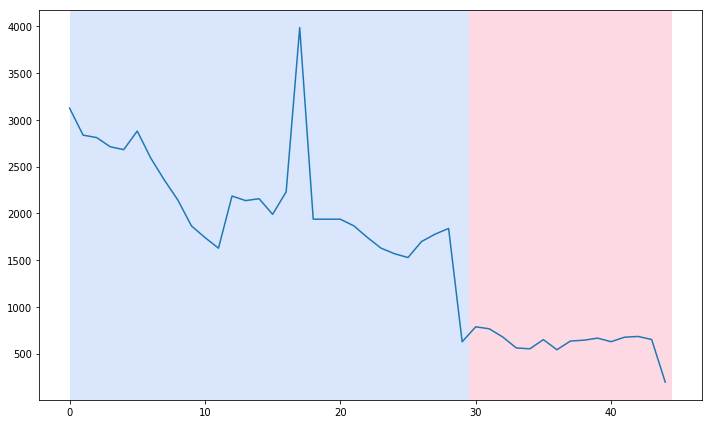

In [77]:
model="rbf"
points=np.array(data['UNSAFEACT'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18cb9ddd8>])

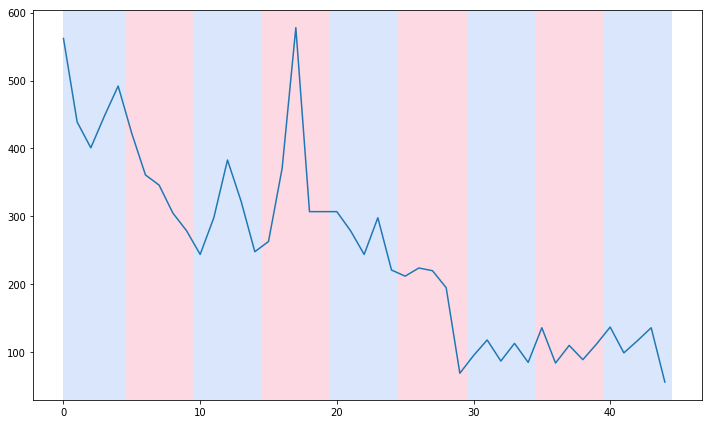

In [79]:
model="l2"
points=np.array(data['SAFECONDITIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e343898>])

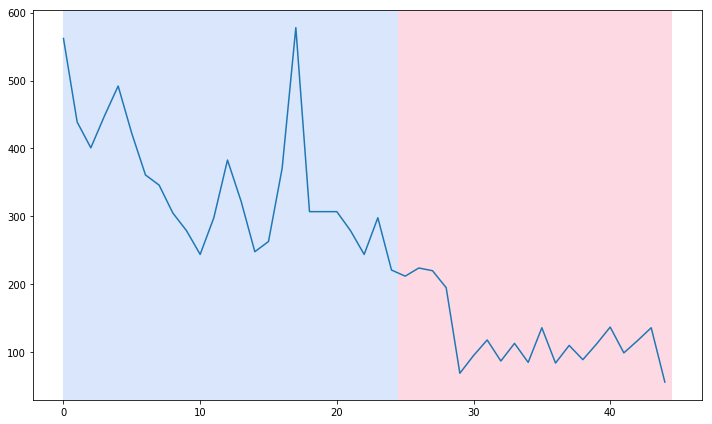

In [80]:
model="rbf"
points=np.array(data['SAFECONDITIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e3a1048>])

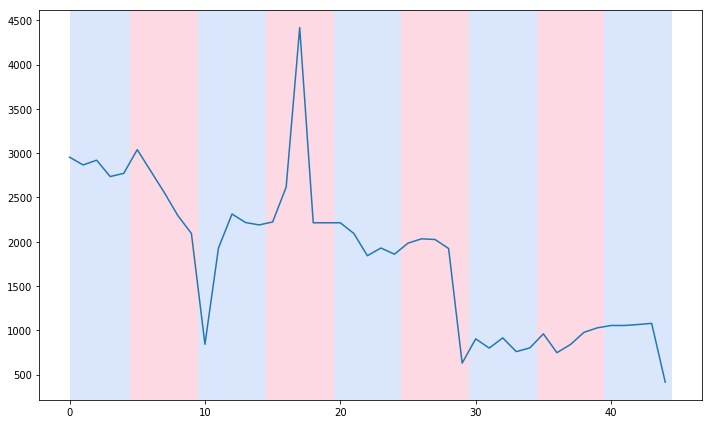

In [81]:
model="l2"
points=np.array(data['UNSAFECONDITION'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e418a58>])

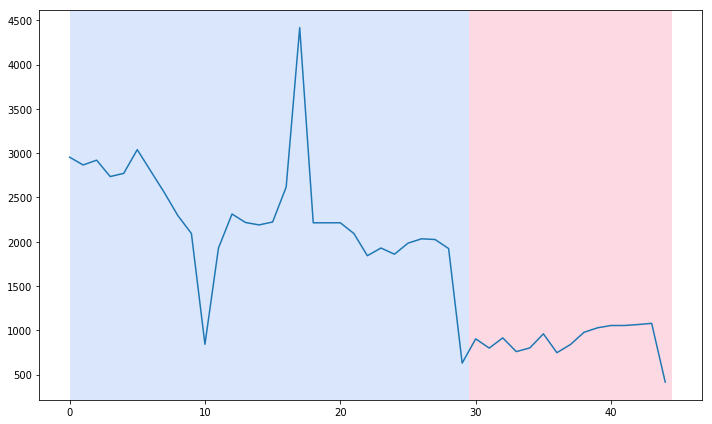

In [82]:
model="rbf"
points=np.array(data['UNSAFECONDITION'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e446eb8>])

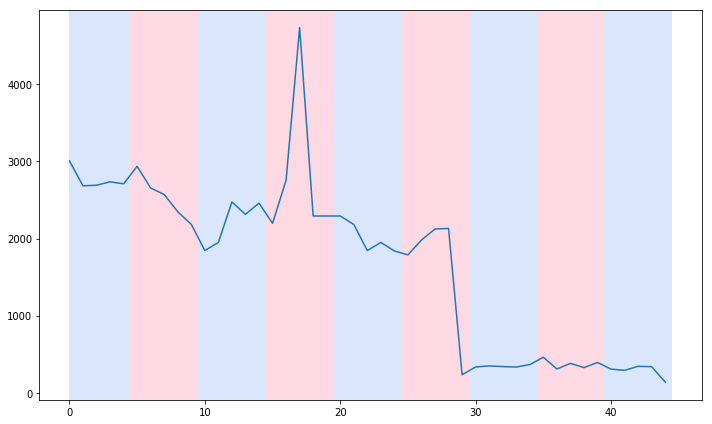

In [83]:
model="l2"
points=np.array(data['PROCEDURE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e628a20>])

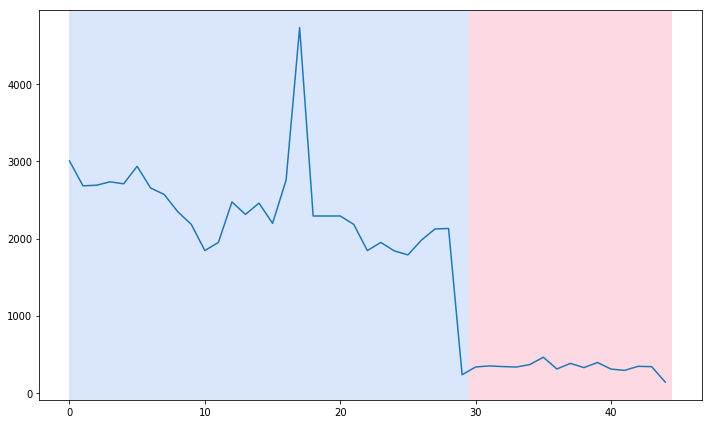

In [84]:
model="rbf"
points=np.array(data['PROCEDURE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e684710>])

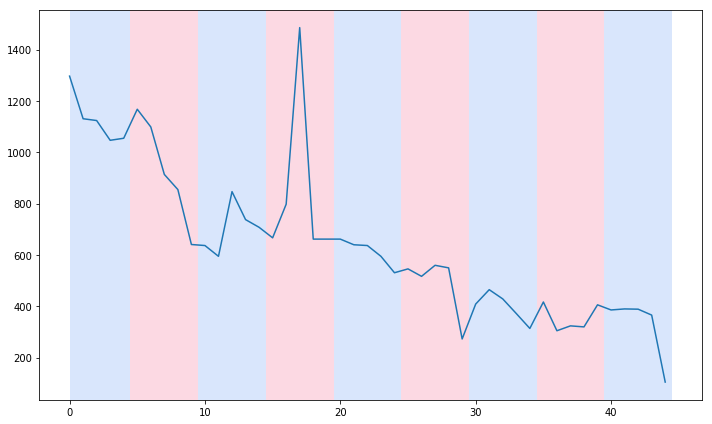

In [85]:
model="l2"
points=np.array(data['PPE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18bf55780>])

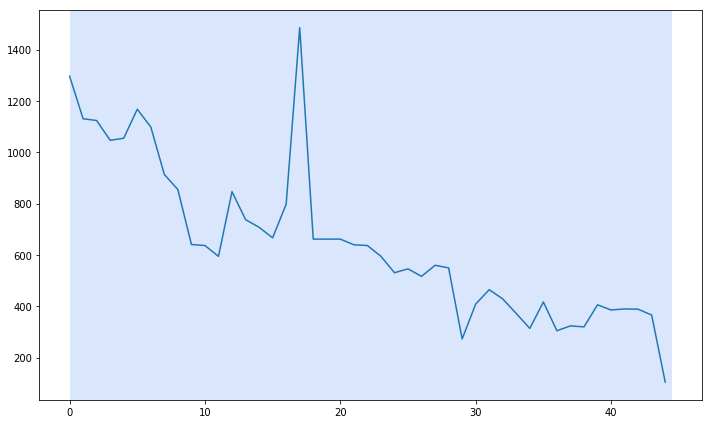

In [86]:
model="rbf"
points=np.array(data['PPE'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18beab400>])

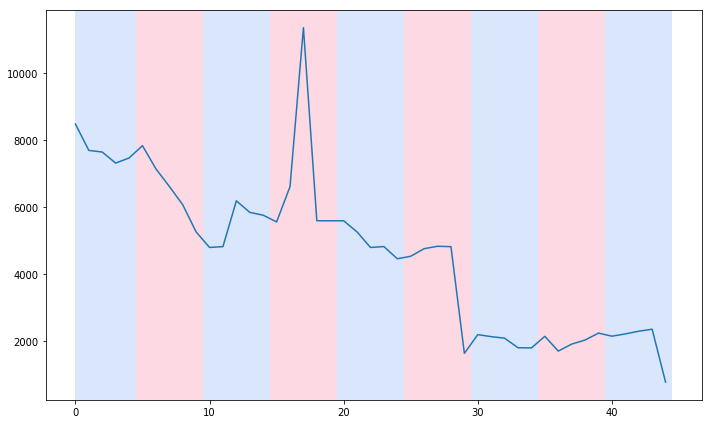

In [87]:
model="l2"
points=np.array(data['SAFETYOBSERVATIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e6af9b0>])

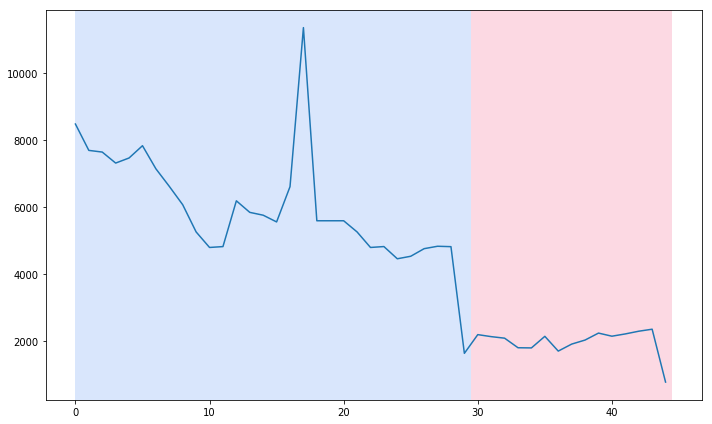

In [88]:
model="rbf"
points=np.array(data['SAFETYOBSERVATIONS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18e715b00>])

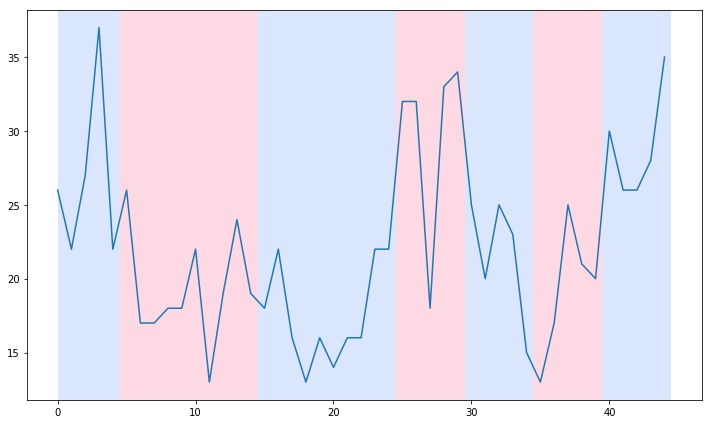

In [89]:
model="l2"
points=np.array(data['TRIFR'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18f26bef0>])

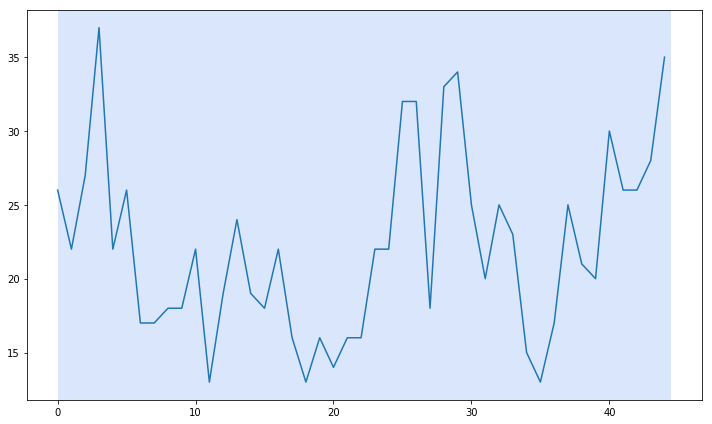

In [90]:
model="rbf"
points=np.array(data['TRIFR'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18eaf0b70>])

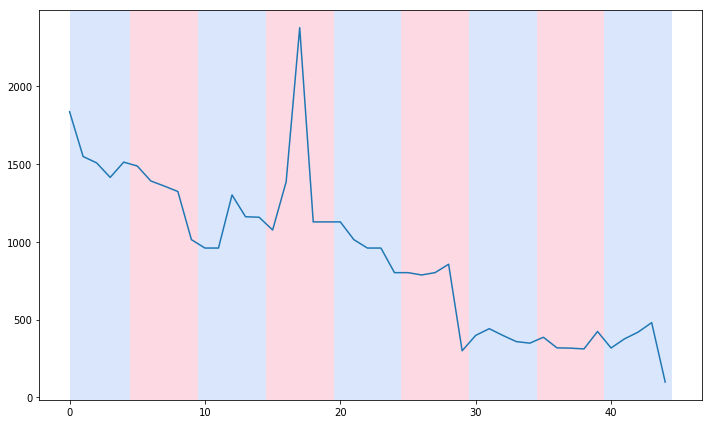

In [91]:
model="l2"
points=np.array(data['SAFEACTS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1d18eb58470>])

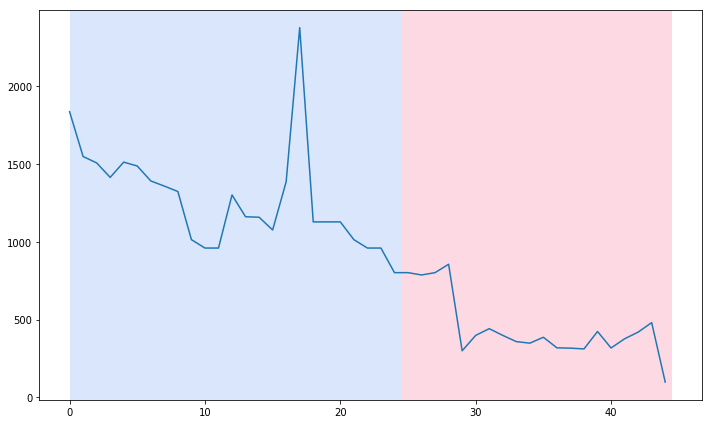

In [92]:
model="rbf"
points=np.array(data['SAFEACTS'])
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))

<h3>Maximum Likelihood Estimation Calculations</h3>

In [93]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\abhishek khemariya\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data =

In [105]:
data = data_l1n

In [106]:
data.shape

(45, 8)

In [107]:
row=[]
for i in range(45):
    row.append(data[i][7])

In [111]:
col=[]
for i in range(45):
    col.append(data[i][0])
sm.OLS(col,row).fit().summary()
#MLE between Safeacts and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.441
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                              34.64
Date:                Thu, 21 May 2020   Prob (F-statistic):                    4.96e-07
Time:                        22:42:41   Log-Likelihood:                          64.213
No. Observations:                  45   AIC:                                     -126.4
Df Residuals:                      44   BIC:                                     -124.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.9937      2.038      5.886      0.000       7.887      16.100
==============================================================================
Omnibus:                       64.271   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.171
Skew:                          -3.545   Prob(JB):                    9.37e-125
Kurtosis:                      18.948   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
col=[]
for i in range(45):
    col.append(data[i][1])
sm.OLS(col,row).fit().summary()
#MLE between Safecondition and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.527
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              49.08
Date:                Thu, 21 May 2020   Prob (F-statistic):                    1.12e-08
Time:                        22:43:20   Log-Likelihood:                          124.98
No. Observations:                  45   AIC:                                     -248.0
Df Residuals:                      44   BIC:                                     -246.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6996      0.528      7.006      0.000       2.635       4.764
==============================================================================
Omnibus:                       48.393   Durbin-Watson:                   0.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.589
Skew:                          -2.677   Prob(JB):                     1.40e-50
Kurtosis:                      12.684   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
col=[]
for i in range(45):
    col.append(data[i][2])
sm.OLS(col,row).fit().summary()
#MLE between Unsafeact and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.453
Model:                            OLS   Adj. R-squared (uncentered):              0.441
Method:                 Least Squares   F-statistic:                              36.46
Date:                Thu, 21 May 2020   Prob (F-statistic):                    2.96e-07
Time:                        22:44:48   Log-Likelihood:                          38.437
No. Observations:                  45   AIC:                                     -74.87
Df Residuals:                      44   BIC:                                     -73.07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            21.8178      3.613      6.038      0.000      14.536      29.100
==============================================================================
Omnibus:                       64.163   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.183
Skew:                          -3.534   Prob(JB):                    9.32e-125
Kurtosis:                      18.958   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
col=[]
for i in range(45):
    col.append(data[i][3])
sm.OLS(col,row).fit().summary()
#MLE between Unsafecondition and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.575
Model:                            OLS   Adj. R-squared (uncentered):              0.565
Method:                 Least Squares   F-statistic:                              59.49
Date:                Thu, 21 May 2020   Prob (F-statistic):                    1.05e-09
Time:                        22:45:05   Log-Likelihood:                          35.704
No. Observations:                  45   AIC:                                     -69.41
Df Residuals:                      44   BIC:                                     -67.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            29.6145      3.840      7.713      0.000      21.876      37.353
==============================================================================
Omnibus:                       67.848   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.888
Skew:                          -3.803   Prob(JB):                    8.40e-144
Kurtosis:                      20.133   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
col=[]
for i in range(45):
    col.append(data[i][4])
sm.OLS(col,row).fit().summary()
#MLE between Procedure and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.246
Method:                 Least Squares   F-statistic:                              15.65
Date:                Thu, 21 May 2020   Prob (F-statistic):                    0.000273
Time:                        22:45:23   Log-Likelihood:                          33.557
No. Observations:                  45   AIC:                                     -65.11
Df Residuals:                      44   BIC:                                     -63.31
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.9334      4.027      3.956      0.000       7.817      24.050
==============================================================================
Omnibus:                       19.045   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.559
Skew:                          -1.448   Prob(JB):                     4.65e-06
Kurtosis:                       5.169   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
col=[]
for i in range(45):
    col.append(data[i][5])
sm.OLS(col,row).fit().summary()
#MLE between PPE and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              54.97
Date:                Thu, 21 May 2020   Prob (F-statistic):                    2.84e-09
Time:                        22:45:46   Log-Likelihood:                          79.780
No. Observations:                  45   AIC:                                     -157.6
Df Residuals:                      44   BIC:                                     -155.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.6897      1.442      7.414      0.000       7.784      13.595
==============================================================================
Omnibus:                       80.765   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.090
Skew:                          -4.663   Prob(JB):                    3.25e-280
Kurtosis:                      27.484   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
col=[]
for i in range(45):
    col.append(data[i][6])
sm.OLS(col,row).fit().summary()
#MLE between Safetyobservation and TRIFR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.496
Method:                 Least Squares   F-statistic:                              45.32
Date:                Thu, 21 May 2020   Prob (F-statistic):                    2.83e-08
Time:                        22:46:04   Log-Likelihood:                         -7.3870
No. Observations:                  45   AIC:                                      16.77
Df Residuals:                      44   BIC:                                      18.58
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            67.3424     10.003      6.732      0.000      47.182      87.503
==============================================================================
Omnibus:                       67.084   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.808
Skew:                          -3.731   Prob(JB):                    2.90e-142
Kurtosis:                      20.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""